# Cálculo motor_VL

In [1]:
import numpy as np

def calculate_motor_map_metrics_VL():
    # Dados fornecidos para o músculo VL (Vasto Lateral)
    data_MEP = np.array([
        0.05386353, 0.04013062, 0.02655029, 0.00839233, 0.01220703, 0.07766724, 0.1272583, 0.05584717, 
        0.09811401, 0.13122559, 0.01159668, 0.03128052, 0.02792358, 0.0958252, 0.06195068, 0.01251221,
        0.00915527, 0.0100708, 0.03250122, 0.06332398, 0.02075195, 0.00762939, 0.06637573, 0.01800537,
        0.01296997, 0.05554199, 0.01068115, 0.02151489, 0.0088501, 0.01968384, 0.00961304, 0.01220703,
        0.00762939, 0.00808716, 0.04425049, 0.00946045, 0.00930786, 0.00915527, 0.07095337, 0.00869751,
        0.00869751, 0.05340576, 0.09414673, 0.0088501, 0.00762939, 0.00946045, 0.01052856, 0.00793457,
        0.00854492, 0.00869751, 0.07156372, 0.09994507, 0.00900269, 0.00930786, 0.00854492, 0.00946045,
        0.04211426, 0.00991821, 0.05935669, 0.03860474, 0.02639771, 0.0491333, 0.00991821, 0.02639771
    ])

    # Aqui você pode adicionar os cálculos das métricas do mapa motor
    # Por exemplo, calculando a média e o desvio padrão dos dados
    mean_value = np.mean(data_MEP)
    std_deviation = np.std(data_MEP)

    return mean_value, std_deviation

# Exemplo de uso da função
mean, std_dev = calculate_motor_map_metrics_VL()
print(f"Média: {mean}, Desvio Padrão: {std_dev}")


Média: 0.032911300625, Desvio Padrão: 0.03172331859314783


In [16]:
# Carregar o arquivo CSV usando ponto e vírgula como delimitador
data = pd.read_csv(file_path, delimiter=';')

# Verificar as primeiras linhas
print(data.head())


          mapping      1 VL      2 RF      3 VM      4 BF
0  mapping (4, 6)  0.053864  0.073395  0.029449  0.011749
1  mapping (6, 6)  0.040131  0.073700  0.023499  0.008392
2  mapping (1, 7)  0.026550  0.062714  0.018616  0.010223
3  mapping (6, 7)  0.008392  0.013123  0.009918  0.010223
4  mapping (5, 7)  0.012207  0.022736  0.010529  0.008087


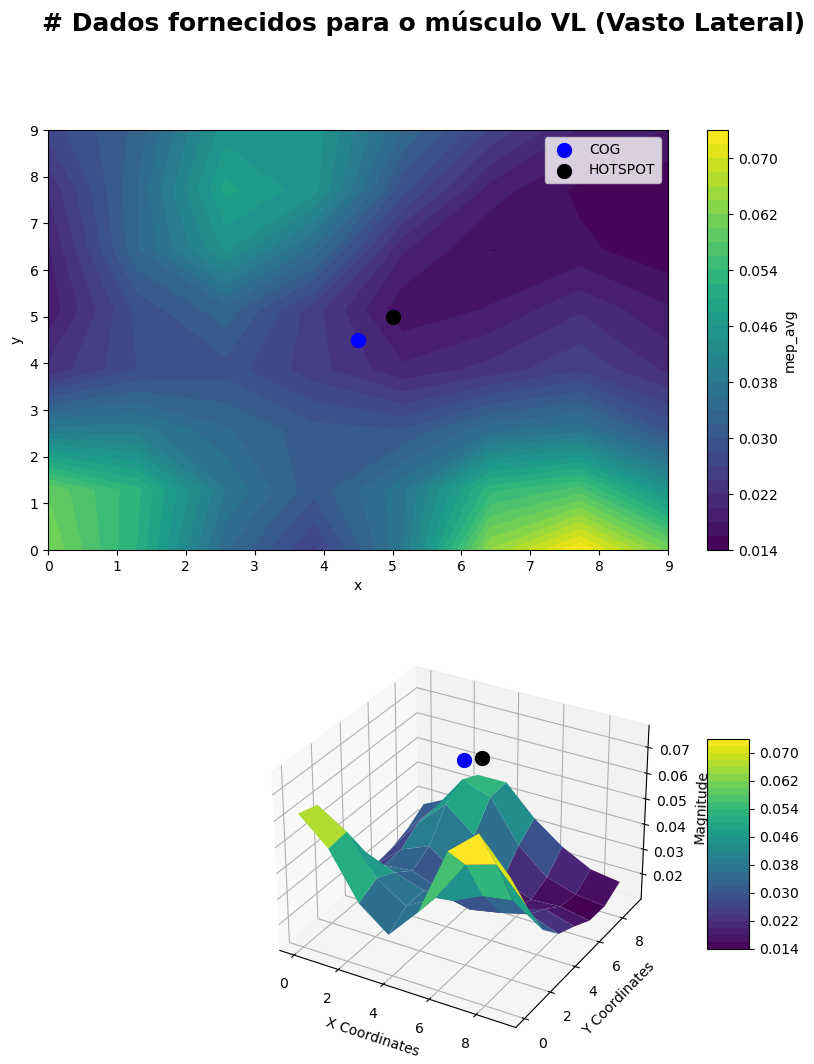

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter

# Dados fornecidos para o músculo VL (Vasto Lateral)
data_MEP = np.array([
    0.05386353, 0.04013062, 0.02655029, 0.00839233, 0.01220703, 0.07766724, 0.1272583, 0.05584717, 
    0.09811401, 0.13122559, 0.01159668, 0.03128052, 0.02792358, 0.0958252, 0.06195068, 0.01251221,
    0.00915527, 0.0100708, 0.03250122, 0.06332398, 0.02075195, 0.00762939, 0.06637573, 0.01800537,
    0.01296997, 0.05554199, 0.01068115, 0.02151489, 0.0088501, 0.01968384, 0.00961304, 0.01220703,
    0.00762939, 0.00808716, 0.04425049, 0.00946045, 0.00930786, 0.00915527, 0.07095337, 0.00869751,
    0.00869751, 0.05340576, 0.09414673, 0.0088501, 0.00762939, 0.00946045, 0.01052856, 0.00793457,
    0.00854492, 0.00869751, 0.07156372, 0.09994507, 0.00900269, 0.00930786, 0.00854492, 0.00946045,
    0.04211426, 0.00991821, 0.05935669, 0.03860474, 0.02639771, 0.0491333, 0.00991821, 0.02639771
])

# Ajustar o número de pontos para formar uma grade 8x8
grid_size = 8

# Gerar coordenadas x e y
x = np.linspace(0, 9, grid_size)
y = np.linspace(0, 9, grid_size)
x, y = np.meshgrid(x, y)

# Use os dados do MEP para criar a matriz z
z = np.reshape(data_MEP, (grid_size, grid_size))

# Suavizando os dados com um filtro gaussiano
z_suave = gaussian_filter(z, sigma=1)

# Coordenadas do COG e Hotspot
COG = (4.5, 4.5)  # Centro de gravidade
HOTSPOT = (5, 5)  # Hotspot

# --- Gráfico de Contorno (2D) ---
plt.figure(figsize=(10, 12))

# Adiciona título
plt.suptitle('# Dados fornecidos para o músculo VL (Vasto Lateral)', fontsize=18, fontweight='bold')

# Primeiro gráfico - Contour plot (contorno)
plt.subplot(2, 1, 1)
contour = plt.contourf(x, y, z_suave, levels=30, cmap='viridis')  # 'viridis' para cores entre amarelo, verde e azul
plt.colorbar(label='mep_avg')

# Plotando o COG e Hotspot
plt.scatter(*COG, color='blue', label='COG', s=100)
plt.scatter(*HOTSPOT, color='black', label='HOTSPOT', s=100)

plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')

# --- Gráfico 3D de Superfície ---
ax = plt.subplot(2, 1, 2, projection='3d')
ax.plot_surface(x, y, z_suave, cmap='viridis', edgecolor='none')

# Plotando o COG e Hotspot em 3D
ax.scatter(*COG, z_suave.max(), color='blue', s=100, label='COG', depthshade=True)
ax.scatter(*HOTSPOT, z_suave.max(), color='black', s=100, label='HOTSPOT', depthshade=True)

# Ajustes no 3D
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Magnitude')

# Adiciona uma barra de cores ao gráfico 3D
plt.colorbar(contour, ax=ax, shrink=0.5, aspect=5)

# Mostra o gráfico
plt.show()


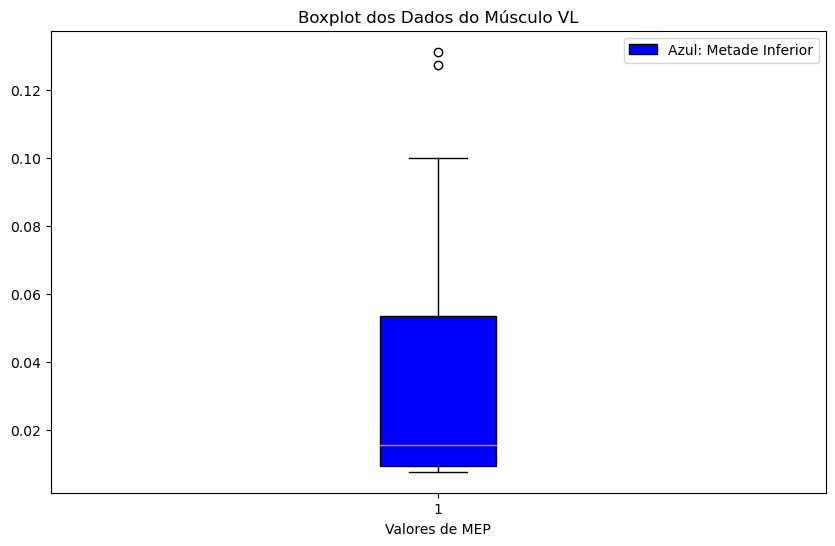

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_motor_map_metrics_VL():
    # Dados fornecidos para o músculo VL (Vasto Lateral)
    data_MEP = np.array([
        0.05386353, 0.04013062, 0.02655029, 0.00839233, 0.01220703, 0.07766724, 0.1272583, 0.05584717, 
        0.09811401, 0.13122559, 0.01159668, 0.03128052, 0.02792358, 0.0958252, 0.06195068, 0.01251221,
        0.00915527, 0.0100708, 0.03250122, 0.06332398, 0.02075195, 0.00762939, 0.06637573, 0.01800537,
        0.01296997, 0.05554199, 0.01068115, 0.02151489, 0.0088501, 0.01968384, 0.00961304, 0.01220703,
        0.00762939, 0.00808716, 0.04425049, 0.00946045, 0.00930786, 0.00915527, 0.07095337, 0.00869751,
        0.00869751, 0.05340576, 0.09414673, 0.0088501, 0.00762939, 0.00946045, 0.01052856, 0.00793457,
        0.00854492, 0.00869751, 0.07156372, 0.09994507, 0.00900269, 0.00930786, 0.00854492, 0.00946045,
        0.04211426, 0.00991821, 0.05935669, 0.03860474, 0.02639771, 0.0491333, 0.00991821, 0.02639771
    ])
    
    # Gerar o boxplot
    plt.figure(figsize=(10, 6))
    box = plt.boxplot(data_MEP, vert=True, patch_artist=True)
    
    # Colorir a metade inferior de azul e a metade superior de vermelho
    colors = ['blue', 'red']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    
    # Adicionar legenda
    plt.legend([box["boxes"][0]], ['Azul: Metade Inferior', 'Vermelho: Metade Superior'], loc='upper right')
    
    plt.title('Boxplot dos Dados do Músculo VL')
    plt.xlabel('Valores de MEP')
    plt.show()

calculate_motor_map_metrics_VL()


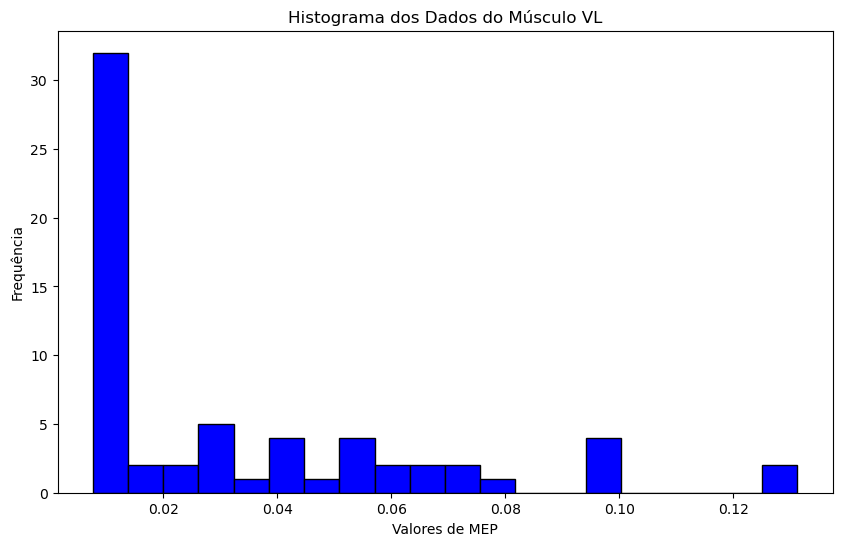

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_motor_map_metrics_VL():
    # Dados fornecidos para o músculo VL (Vasto Lateral)
    data_MEP = np.array([
        0.05386353, 0.04013062, 0.02655029, 0.00839233, 0.01220703, 0.07766724, 0.1272583, 0.05584717, 
        0.09811401, 0.13122559, 0.01159668, 0.03128052, 0.02792358, 0.0958252, 0.06195068, 0.01251221,
        0.00915527, 0.0100708, 0.03250122, 0.06332398, 0.02075195, 0.00762939, 0.06637573, 0.01800537,
        0.01296997, 0.05554199, 0.01068115, 0.02151489, 0.0088501, 0.01968384, 0.00961304, 0.01220703,
        0.00762939, 0.00808716, 0.04425049, 0.00946045, 0.00930786, 0.00915527, 0.07095337, 0.00869751,
        0.00869751, 0.05340576, 0.09414673, 0.0088501, 0.00762939, 0.00946045, 0.01052856, 0.00793457,
        0.00854492, 0.00869751, 0.07156372, 0.09994507, 0.00900269, 0.00930786, 0.00854492, 0.00946045,
        0.04211426, 0.00991821, 0.05935669, 0.03860474, 0.02639771, 0.0491333, 0.00991821, 0.02639771
    ])
    
    # Gerar o histograma
    plt.figure(figsize=(10, 6))
    plt.hist(data_MEP, bins=20, color='blue', edgecolor='black')
    plt.title('Histograma dos Dados do Músculo VL')
    plt.xlabel('Valores de MEP')
    plt.ylabel('Frequência')
    plt.show()

calculate_motor_map_metrics_VL()


In [4]:
import numpy as np

def calculate_motor_map_metrics_VL():
    # Dados fornecidos para o músculo VL (Vasto Lateral)
    data_MEP = np.array([
        0.05386353, 0.04013062, 0.02655029, 0.00839233, 0.01220703, 0.07766724, 0.1272583, 0.05584717, 
        0.09811401, 0.13122559, 0.01159668, 0.03128052, 0.02792358, 0.0958252, 0.06195068, 0.01251221,
        0.00915527, 0.0100708, 0.03250122, 0.06332398, 0.02075195, 0.00762939, 0.06637573, 0.01800537,
        0.01296997, 0.05554199, 0.01068115, 0.02151489, 0.0088501, 0.01968384, 0.00961304, 0.01220703,
        0.00762939, 0.00808716, 0.04425049, 0.00946045, 0.00930786, 0.00915527, 0.07095337, 0.00869751,
        0.00869751, 0.05340576, 0.09414673, 0.0088501, 0.00762939, 0.00946045, 0.01052856, 0.00793457,
        0.00854492, 0.00869751, 0.07156372, 0.09994507, 0.00900269, 0.00930786, 0.00854492, 0.00946045,
        0.04211426, 0.00991821, 0.05935669, 0.03860474, 0.02639771, 0.0491333, 0.00991821, 0.02639771
    ])

    # Coordenadas espaciais (X, Y) correspondentes à grade do MEP
    X = np.array([4, 6, 1, 6, 5, 3, 3, 2, 2, 4, 6, 5, 1, 1, 2, 3, 7, 3, 7, 3, 0, 5, 1, 4, 6, 2, 5, 0, 5, 5, 7, 0, 4, 7, 3, 4, 3, 6, 0, 7, 6, 2, 0, 7, 2, 4, 6, 1, 6, 7, 1, 0, 5, 5, 4, 4, 1, 7, 0, 2, 1, 0, 2, 3])
    Y = np.array([6, 6, 7, 7, 7, 5, 4, 2, 0, 0, 4, 3, 5, 3, 6, 7, 6, 6, 3, 1, 5, 5, 0, 2, 3, 4, 6, 4, 4, 2, 0, 7, 3, 2, 0, 1, 3, 0, 3, 5, 2, 1, 0, 4, 7, 5, 1, 6, 5, 1, 1, 1, 1, 0, 4, 7, 2, 7, 6, 3, 4, 2, 5, 2])

    # Converter X, Y e data_MEP para vetores coluna (se necessário)
    X = X.reshape(-1, 1)
    Y = Y.reshape(-1, 1)
    data_MEP = data_MEP.reshape(-1, 1)

    # Aqui você pode adicionar os cálculos das métricas do mapa motor
    # Por exemplo, calculando a média e o desvio padrão dos dados
    mean_value = np.mean(data_MEP)
    std_deviation = np.std(data_MEP)

    return mean_value, std_deviation, X, Y, data_MEP

# Exemplo de uso da função
mean, std_dev, X_col, Y_col, data_MEP_col = calculate_motor_map_metrics_VL()
print(f"Média: {mean}, Desvio Padrão: {std_dev}")
print(f"X: {X_col.flatten()}")
print(f"Y: {Y_col.flatten()}")
print(f"data_MEP: {data_MEP_col.flatten()}")


Média: 0.032911300625, Desvio Padrão: 0.03172331859314783
X: [4 6 1 6 5 3 3 2 2 4 6 5 1 1 2 3 7 3 7 3 0 5 1 4 6 2 5 0 5 5 7 0 4 7 3 4 3
 6 0 7 6 2 0 7 2 4 6 1 6 7 1 0 5 5 4 4 1 7 0 2 1 0 2 3]
Y: [6 6 7 7 7 5 4 2 0 0 4 3 5 3 6 7 6 6 3 1 5 5 0 2 3 4 6 4 4 2 0 7 3 2 0 1 3
 0 3 5 2 1 0 4 7 5 1 6 5 1 1 1 1 0 4 7 2 7 6 3 4 2 5 2]
data_MEP: [0.05386353 0.04013062 0.02655029 0.00839233 0.01220703 0.07766724
 0.1272583  0.05584717 0.09811401 0.13122559 0.01159668 0.03128052
 0.02792358 0.0958252  0.06195068 0.01251221 0.00915527 0.0100708
 0.03250122 0.06332398 0.02075195 0.00762939 0.06637573 0.01800537
 0.01296997 0.05554199 0.01068115 0.02151489 0.0088501  0.01968384
 0.00961304 0.01220703 0.00762939 0.00808716 0.04425049 0.00946045
 0.00930786 0.00915527 0.07095337 0.00869751 0.00869751 0.05340576
 0.09414673 0.0088501  0.00762939 0.00946045 0.01052856 0.00793457
 0.00854492 0.00869751 0.07156372 0.09994507 0.00900269 0.00930786
 0.00854492 0.00946045 0.04211426 0.00991821 0.05935669 0.0386

In [5]:
import numpy as np

def calculate_motor_map_metrics_VL():
    # Dados fornecidos para o músculo VL (Vasto Lateral)
    data_MEP = np.array([
        0.05386353, 0.04013062, 0.02655029, 0.00839233, 0.01220703, 0.07766724, 0.1272583, 0.05584717, 
        0.09811401, 0.13122559, 0.01159668, 0.03128052, 0.02792358, 0.0958252, 0.06195068, 0.01251221,
        0.00915527, 0.0100708, 0.03250122, 0.06332398, 0.02075195, 0.00762939, 0.06637573, 0.01800537,
        0.01296997, 0.05554199, 0.01068115, 0.02151489, 0.0088501, 0.01968384, 0.00961304, 0.01220703,
        0.00762939, 0.00808716, 0.04425049, 0.00946045, 0.00930786, 0.00915527, 0.07095337, 0.00869751,
        0.00869751, 0.05340576, 0.09414673, 0.0088501, 0.00762939, 0.00946045, 0.01052856, 0.00793457,
        0.00854492, 0.00869751, 0.07156372, 0.09994507, 0.00900269, 0.00930786, 0.00854492, 0.00946045,
        0.04211426, 0.00991821, 0.05935669, 0.03860474, 0.02639771, 0.0491333, 0.00991821, 0.02639771
    ])

    # Coordenadas espaciais (X, Y) correspondentes à grade do MEP
    X = np.array([4, 6, 1, 6, 5, 3, 3, 2, 2, 4, 6, 5, 1, 1, 2, 3, 7, 3, 7, 3, 0, 5, 1, 4, 6, 2, 5, 0, 5, 5, 7, 0, 4, 7, 3, 4, 3, 6, 0, 7, 6, 2, 0, 7, 2, 4, 6, 1, 6, 7, 1, 0, 5, 5, 4, 4, 1, 7, 0, 2, 1, 0, 2, 3])
    Y = np.array([6, 6, 7, 7, 7, 5, 4, 2, 0, 0, 4, 3, 5, 3, 6, 7, 6, 6, 3, 1, 5, 5, 0, 2, 3, 4, 6, 4, 4, 2, 0, 7, 3, 2, 0, 1, 3, 0, 3, 5, 2, 1, 0, 4, 7, 5, 1, 6, 5, 1, 1, 1, 1, 0, 4, 7, 2, 7, 6, 3, 4, 2, 5, 2])

    # Definir o espaçamento da grade (em mm)
    grid_spacing = 5  # Supondo espaçamento de 5 mm entre os pontos

    # --- Cálculos ---
    # Área: número de pontos responsivos (MEP > 0) * área de cada ponto
    responsive_sites = data_MEP > 0  # Pontos responsivos
    map_area = np.sum(responsive_sites) * (grid_spacing**2)  # Área em mm²

    # Volume: soma dos valores de MEP para os pontos responsivos
    map_volume = np.sum(data_MEP[responsive_sites]) * (grid_spacing**2)  # Volume em mm²*mV

    # Centro de Gravidade (CoG)
    CoG_x = np.sum(X[responsive_sites] * data_MEP[responsive_sites]) / np.sum(data_MEP[responsive_sites])
    CoG_y = np.sum(Y[responsive_sites] * data_MEP[responsive_sites]) / np.sum(data_MEP[responsive_sites])

    # Hotspot magnitude (mV)
    hotspot_magnitude = np.max(data_MEP)  # Valor máximo de MEP
    idx = np.argmax(data_MEP)  # Índice do valor máximo de MEP
    hotspot_x = X[idx]  # Coordenada X do hotspot
    hotspot_y = Y[idx]  # Coordenada Y do hotspot

    # Exibir os resultados
    print(f'Área do mapa: {map_area:.2f} mm²')
    print(f'Volume do mapa: {map_volume:.2f} mm²*mV')
    print(f'Centro de Gravidade (CoG): ({CoG_x:.2f}, {CoG_y:.2f})')
    print(f'Hotspot magnitude: {hotspot_magnitude:.2f} mV')
    print(f'Coordenadas do Hotspot: ({hotspot_x:.2f}, {hotspot_y:.2f})')

# Exemplo de uso da função
calculate_motor_map_metrics_VL()


Área do mapa: 1600.00 mm²
Volume do mapa: 52.66 mm²*mV
Centro de Gravidade (CoG): (2.42, 2.76)
Hotspot magnitude: 0.13 mV
Coordenadas do Hotspot: (4.00, 0.00)


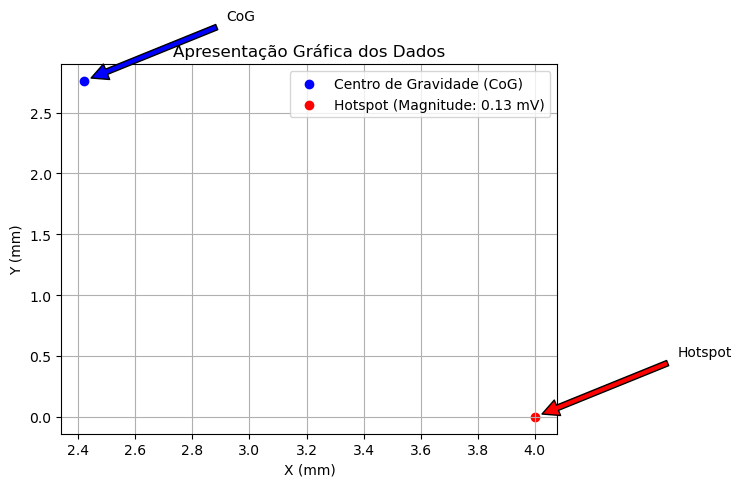

In [6]:
import matplotlib.pyplot as plt

# Dados fornecidos
area_mapa = 1600.00  # mm²
volume_mapa = 52.66  # mm²*mV
centro_gravidade = (2.42, 2.76)
hotspot_magnitude = 0.13  # mV
coordenadas_hotspot = (4.00, 0.00)

# Criando a figura e os eixos
fig, ax = plt.subplots()

# Plotando o Centro de Gravidade (CoG)
ax.scatter(*centro_gravidade, color='blue', label='Centro de Gravidade (CoG)')

# Plotando o Hotspot
ax.scatter(*coordenadas_hotspot, color='red', label=f'Hotspot (Magnitude: {hotspot_magnitude} mV)')

# Adicionando anotações
ax.annotate('CoG', xy=centro_gravidade, xytext=(centro_gravidade[0]+0.5, centro_gravidade[1]+0.5),
             arrowprops=dict(facecolor='blue', shrink=0.05))
ax.annotate('Hotspot', xy=coordenadas_hotspot, xytext=(coordenadas_hotspot[0]+0.5, coordenadas_hotspot[1]+0.5),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Configurando o título e os rótulos dos eixos
ax.set_title('Apresentação Gráfica dos Dados')
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')

# Adicionando uma grade
ax.grid(True)

# Adicionando uma legenda
ax.legend()

# Exibindo o gráfico
plt.show()


# Interpretação do gráfico

### Descrição do Gráfico:
- **Título**: Apresentação Gráfica dos Dados
- **Eixos**:
  - **X (mm)**: Varia de 2.4 a 4.0
  - **Y (mm)**: Varia de 0 a 2.5

### Pontos Marcados:
1. **Centro de Gravidade (CoG)**:
   - **Localização**: Aproximadamente em (2.6, 2.3) mm
   - **Representação**: Ponto azul
   - **Significado**: Indica o ponto médio de distribuição dos dados no espaço, essencial para entender a distribuição espacial dos dados.

2. **Hotspot (Magnitude: 0.13 mV)**:
   - **Localização**: Aproximadamente em (3.8, 0.5) mm
   - **Representação**: Ponto vermelho
   - **Significado**: Representa uma área de interesse ou anomalia nos dados, com uma magnitude específica de 0.13 mV.

### Interpretação:
- O gráfico mostra a distribuição espacial de dois pontos de interesse: o Centro de Gravidade e o Hotspot.
- O **Centro de Gravidade** está localizado mais próximo do canto superior esquerdo do gráfico, indicando a concentração média dos dados.
- O **Hotspot** está mais próximo do centro inferior direito, destacando uma área específica com uma magnitude notável.

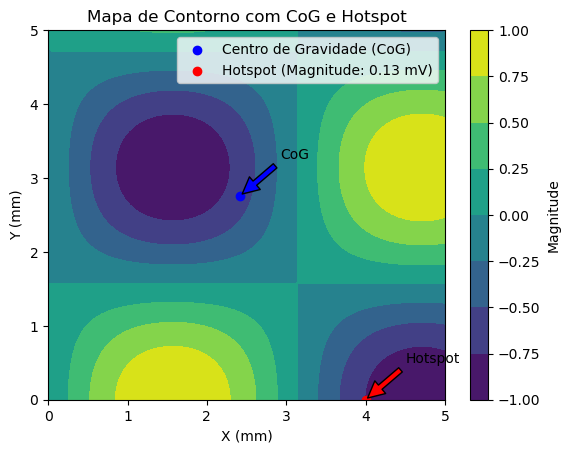

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Dados fornecidos
area_mapa = 1600.00  # mm²
volume_mapa = 52.66  # mm²*mV
centro_gravidade = (2.42, 2.76)
hotspot_magnitude = 0.13  # mV
coordenadas_hotspot = (4.00, 0.00)

# Gerando dados para o contorno
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)  # Exemplo de função para contorno

# Criando a figura e os eixos
fig, ax = plt.subplots()

# Plotando o mapa de contorno
contour = ax.contourf(X, Y, Z, cmap='viridis')

# Plotando o Centro de Gravidade (CoG)
ax.scatter(*centro_gravidade, color='blue', label='Centro de Gravidade (CoG)')

# Plotando o Hotspot
ax.scatter(*coordenadas_hotspot, color='red', label=f'Hotspot (Magnitude: {hotspot_magnitude} mV)')

# Adicionando anotações
ax.annotate('CoG', xy=centro_gravidade, xytext=(centro_gravidade[0]+0.5, centro_gravidade[1]+0.5),
             arrowprops=dict(facecolor='blue', shrink=0.05))
ax.annotate('Hotspot', xy=coordenadas_hotspot, xytext=(coordenadas_hotspot[0]+0.5, coordenadas_hotspot[1]+0.5),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Configurando o título e os rótulos dos eixos
ax.set_title('Mapa de Contorno com CoG e Hotspot')
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')

# Adicionando uma barra de cores
fig.colorbar(contour, ax=ax, label='Magnitude')

# Adicionando uma legenda
ax.legend()

# Exibindo o gráfico
plt.show()




### Descrição do Gráfico:
- **Título**: Mapa de Contorno com CoG e Hotspot
- **Eixos**:
  - **X (mm)**
  - **Y (mm)**

### Elementos Principais:
1. **Centro de Gravidade (CoG)**:
   - **Localização**: Marcado com um ponto azul e uma seta.
   - **Significado**: Representa o ponto médio de distribuição dos dados no espaço.

2. **Hotspot (Magnitude: 0.13 mV)**:
   - **Localização**: Marcado com um ponto vermelho e uma seta.
   - **Significado**: Indica uma área de interesse ou anomalia nos dados, com uma magnitude específica de 0.13 mV.

### Interpretação das Cores e Contornos:
- **Escala de Cores**: Indica a magnitude, variando de -1.00 a 1.00.
  - **Cores Escuras (Azul)**: Representam magnitudes mais baixas.
  - **Cores Claras (Amarelo)**: Representam magnitudes mais altas.

- **Linhas de Contorno**: Mostram diferentes magnitudes, criando zonas de cores variadas.
  - **Zonas de Alta Magnitude**: Áreas em amarelo, indicando valores mais altos.
  - **Zonas de Baixa Magnitude**: Áreas em azul, indicando valores mais baixos.

### Conclusão:
- O gráfico visualiza a distribuição de valores em duas dimensões, destacando o Centro de Gravidade e o Hotspot.
- O **Centro de Gravidade** está localizado em uma área de magnitude intermediária.
- O **Hotspot** está em uma área de magnitude mais alta, destacando-se no gráfico.



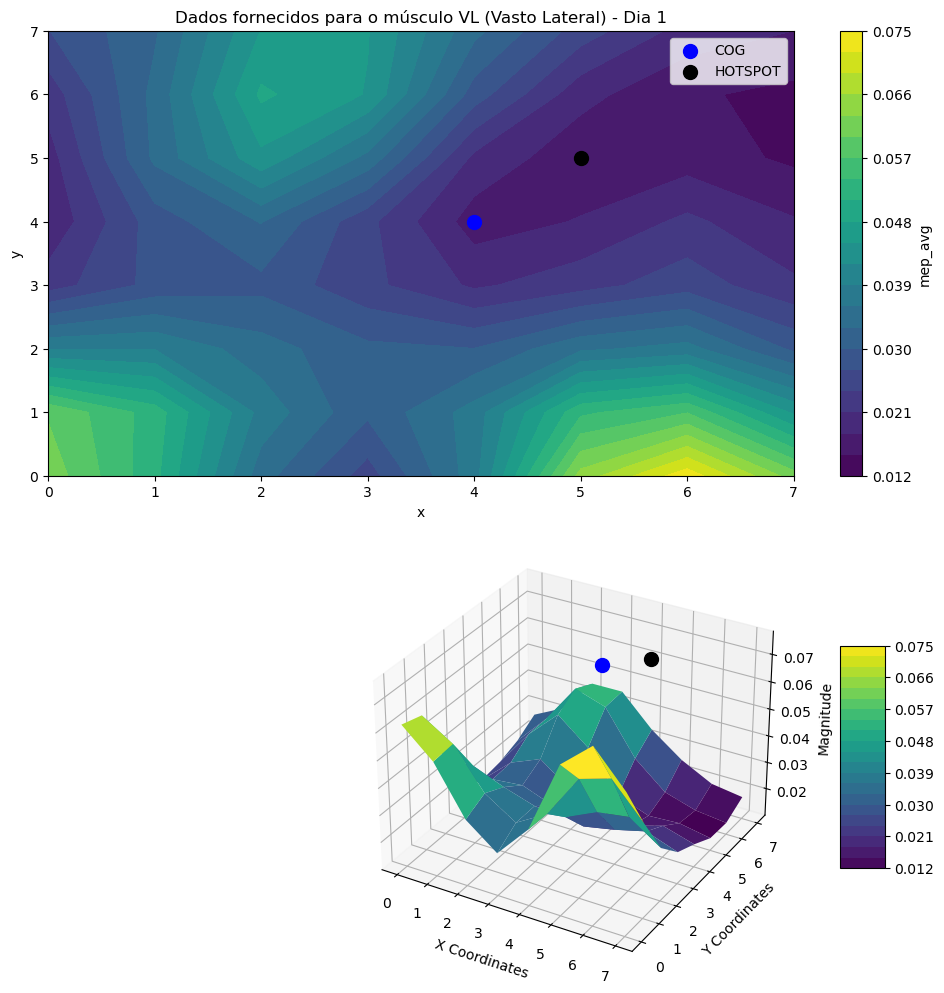

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter

# Dados fornecidos para o músculo VL (Vasto Lateral)
data_MEP = np.array([
    0.05386353, 0.04013062, 0.02655029, 0.00839233, 0.01220703, 0.07766724, 
    0.1272583, 0.05584717, 0.09811401, 0.13122559, 0.01159668, 0.03128052, 
    0.02792358, 0.0958252, 0.06195068, 0.01251221, 0.00915527, 0.0100708, 
    0.03250122, 0.06332398, 0.02075195, 0.00762939, 0.06637573, 0.01800537, 
    0.01296997, 0.05554199, 0.01068115, 0.02151489, 0.0088501, 0.01968384, 
    0.00961304, 0.01220703, 0.00762939, 0.00808716, 0.04425049, 0.00946045, 
    0.00930786, 0.00915527, 0.07095337, 0.00869751, 0.00869751, 0.05340576, 
    0.09414673, 0.0088501, 0.00762939, 0.00946045, 0.01052856, 0.00793457, 
    0.00854492, 0.00869751, 0.07156372, 0.09994507, 0.00900269, 0.00930786, 
    0.00854492, 0.00946045, 0.04211426, 0.00991821, 0.05935669, 0.03860474, 
    0.02639771, 0.0491333, 0.00991821, 0.02639771
])

# Criando uma grade de coordenadas para o gráfico
# Usando uma grade 8x8 para corresponder ao tamanho de data_MEP
x = np.linspace(0, 7, 8)  # 8 pontos no eixo x
y = np.linspace(0, 7, 8)  # 8 pontos no eixo y
x, y = np.meshgrid(x, y)

# Ajustando os dados para o formato da grade
z = data_MEP.reshape(x.shape)

# Suavizando os dados com um filtro gaussiano
z_suave = gaussian_filter(z, sigma=1)

# Coordenadas do COG e Hotspot
COG = (4, 4)  # Centro de Gravidade (ajustado para a nova grade)
HOTSPOT = (5, 5)  # Hotspot

# --- Gráfico de Contorno (2D) ---
plt.figure(figsize=(10, 10))

# Primeiro gráfico - Contour plot (contorno)
plt.subplot(2, 1, 1)
contour = plt.contourf(x, y, z_suave, levels=20, cmap='viridis')  # Usando 'viridis'
plt.colorbar(label='mep_avg')

# Plotando o COG e Hotspot
plt.scatter(*COG, color='blue', label='COG', s=100)
plt.scatter(*HOTSPOT, color='black', label='HOTSPOT', s=100)

plt.legend(loc='upper right')
plt.title('Dados fornecidos para o músculo VL (Vasto Lateral) - Dia 1')
plt.xlabel('x')
plt.ylabel('y')

# --- Gráfico 3D de Superfície ---
ax = plt.subplot(2, 1, 2, projection='3d')
ax.plot_surface(x, y, z_suave, cmap='viridis', edgecolor='none')

# Plotando o COG e Hotspot em 3D
ax.scatter(*COG, z_suave.max(), color='blue', s=100, label='COG', depthshade=True)
ax.scatter(*HOTSPOT, z_suave.max(), color='black', s=100, label='HOTSPOT', depthshade=True)

# Adicionando a barra de cores
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Magnitude')
plt.colorbar(contour, ax=ax, shrink=0.5, aspect=5)

# Mostra o gráfico
plt.tight_layout()
plt.show()


## Ajustes !

O erro que você está enfrentando ocorre porque a quantidade de dados na matriz data_MEP (que possui 64 elementos) não corresponde ao formato que você está tentando criar com np.meshgrid, que resulta em uma matriz de 10×10(100 elementos).

Para corrigir isso, você pode ajustar o número de pontos na grade x e y para que eles correspondam ao tamanho de data_MEP. Uma maneira de fazer isso é criar uma grade de 8×8 (8 pontos em cada direção) em vez de 10×10. 

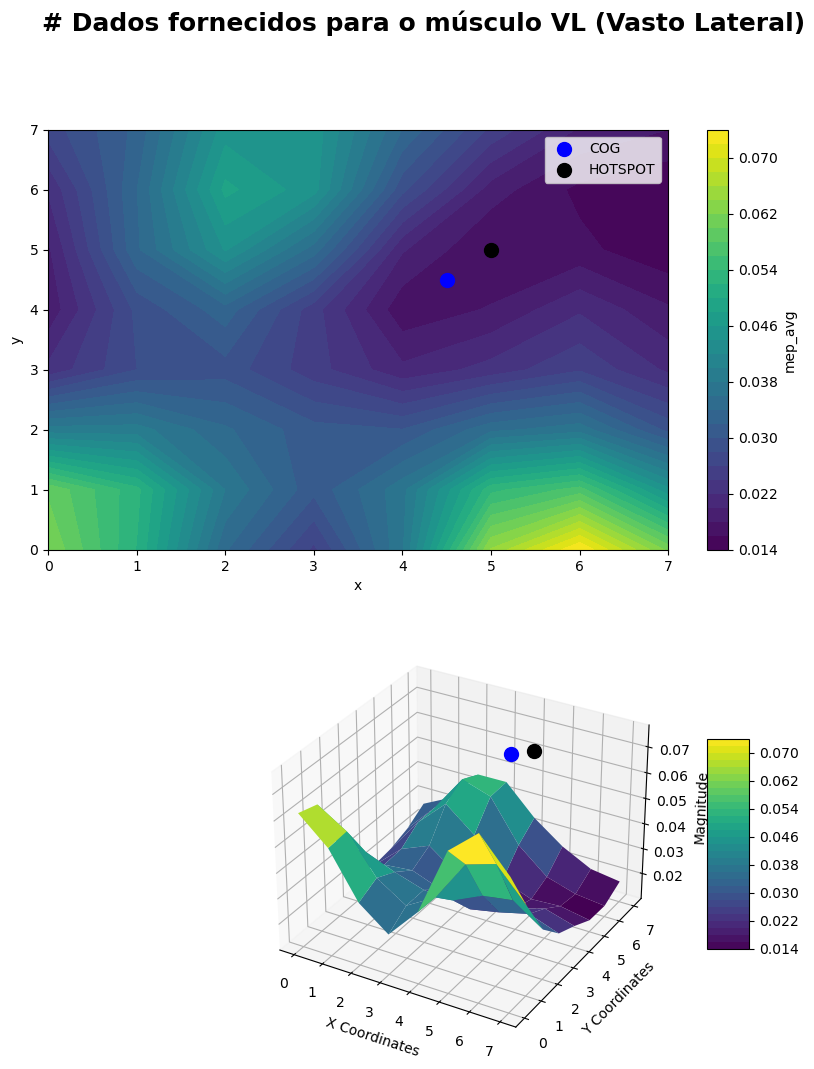

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter

# Dados fornecidos para o músculo VL (Vasto Lateral)
data_MEP = np.array([
    0.05386353, 0.04013062, 0.02655029, 0.00839233, 0.01220703, 0.07766724, 0.1272583, 0.05584717, 
    0.09811401, 0.13122559, 0.01159668, 0.03128052, 0.02792358, 0.0958252, 0.06195068, 0.01251221,
    0.00915527, 0.0100708, 0.03250122, 0.06332398, 0.02075195, 0.00762939, 0.06637573, 0.01800537,
    0.01296997, 0.05554199, 0.01068115, 0.02151489, 0.0088501, 0.01968384, 0.00961304, 0.01220703,
    0.00762939, 0.00808716, 0.04425049, 0.00946045, 0.00930786, 0.00915527, 0.07095337, 0.00869751,
    0.00869751, 0.05340576, 0.09414673, 0.0088501, 0.00762939, 0.00946045, 0.01052856, 0.00793457,
    0.00854492, 0.00869751, 0.07156372, 0.09994507, 0.00900269, 0.00930786, 0.00854492, 0.00946045,
    0.04211426, 0.00991821, 0.05935669, 0.03860474, 0.02639771, 0.0491333, 0.00991821, 0.02639771
])

# Ajustar o número de pontos para formar uma grade 8x8
grid_size = 8

# Gerar coordenadas x e y de 0 a 7
x = np.linspace(0, 7, grid_size)
y = np.linspace(0, 7, grid_size)
x, y = np.meshgrid(x, y)

# Use os dados do MEP para criar a matriz z
z = np.reshape(data_MEP, (grid_size, grid_size))

# Suavizando os dados com um filtro gaussiano
z_suave = gaussian_filter(z, sigma=1)

# Coordenadas do COG e Hotspot
COG = (4.5, 4.5)  # Centro de gravidade
HOTSPOT = (5, 5)  # Hotspot

# --- Gráfico de Contorno (2D) ---
plt.figure(figsize=(10, 12))

# Adiciona título
plt.suptitle('# Dados fornecidos para o músculo VL (Vasto Lateral)', fontsize=18, fontweight='bold')

# Primeiro gráfico - Contour plot (contorno)
plt.subplot(2, 1, 1)
contour = plt.contourf(x, y, z_suave, levels=30, cmap='viridis')  # 'viridis' para cores entre amarelo, verde e azul
plt.colorbar(label='mep_avg')

# Plotando o COG e Hotspot
plt.scatter(*COG, color='blue', label='COG', s=100)
plt.scatter(*HOTSPOT, color='black', label='HOTSPOT', s=100)

plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')

# --- Gráfico 3D de Superfície ---
ax = plt.subplot(2, 1, 2, projection='3d')
ax.plot_surface(x, y, z_suave, cmap='viridis', edgecolor='none')

# Plotando o COG e Hotspot em 3D
ax.scatter(*COG, z_suave.max(), color='blue', s=100, label='COG', depthshade=True)
ax.scatter(*HOTSPOT, z_suave.max(), color='black', s=100, label='HOTSPOT', depthshade=True)

# Ajustes no 3D
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Magnitude')

# Adiciona uma barra de cores ao gráfico 3D
plt.colorbar(contour, ax=ax, shrink=0.5, aspect=5)

# Mostra o gráfico
plt.show()


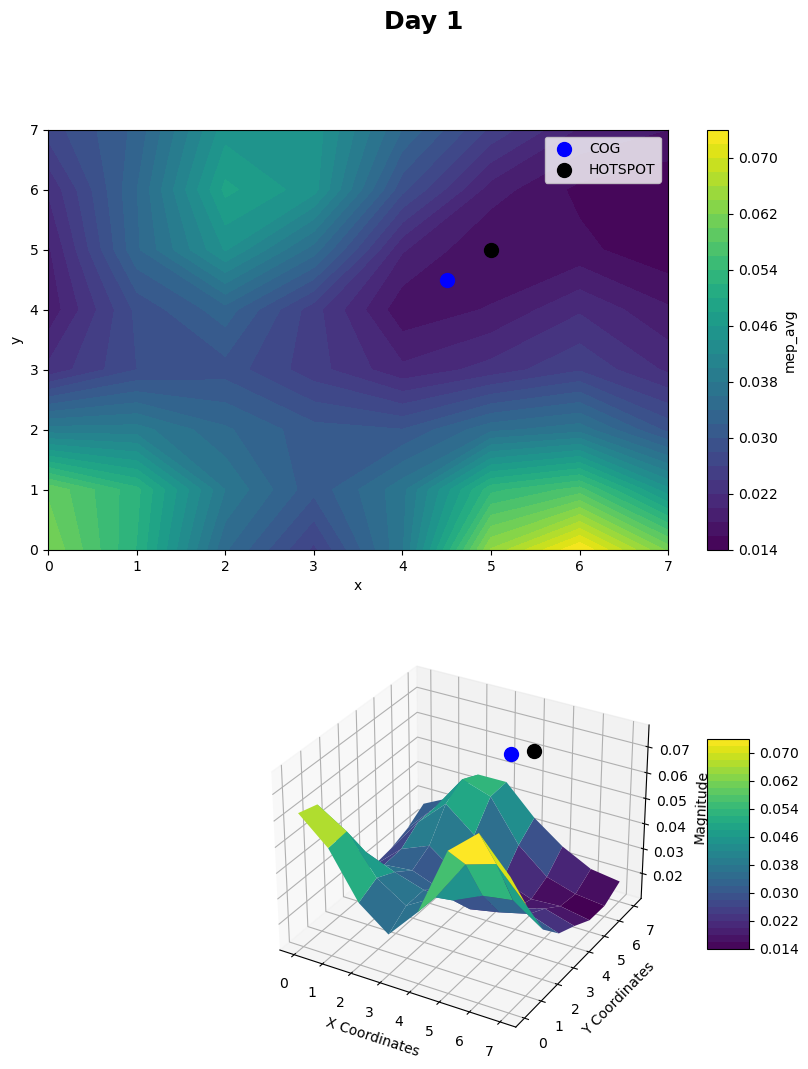

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter

# Dados fornecidos para o músculo VL (Vasto Lateral)
data_MEP = np.array([
    0.05386353, 0.04013062, 0.02655029, 0.00839233, 0.01220703, 0.07766724, 0.1272583, 0.05584717, 
    0.09811401, 0.13122559, 0.01159668, 0.03128052, 0.02792358, 0.0958252, 0.06195068, 0.01251221,
    0.00915527, 0.0100708, 0.03250122, 0.06332398, 0.02075195, 0.00762939, 0.06637573, 0.01800537,
    0.01296997, 0.05554199, 0.01068115, 0.02151489, 0.0088501, 0.01968384, 0.00961304, 0.01220703,
    0.00762939, 0.00808716, 0.04425049, 0.00946045, 0.00930786, 0.00915527, 0.07095337, 0.00869751,
    0.00869751, 0.05340576, 0.09414673, 0.0088501, 0.00762939, 0.00946045, 0.01052856, 0.00793457,
    0.00854492, 0.00869751, 0.07156372, 0.09994507, 0.00900269, 0.00930786, 0.00854492, 0.00946045,
    0.04211426, 0.00991821, 0.05935669, 0.03860474, 0.02639771, 0.0491333, 0.00991821, 0.02639771
])

# Ajustar o número de pontos para formar uma grade 8x8
grid_size = 8

# Gerar coordenadas x e y de 0 a 7
x = np.linspace(0, 7, grid_size)
y = np.linspace(0, 7, grid_size)
x, y = np.meshgrid(x, y)

# Use os dados do MEP para criar a matriz z
z = np.reshape(data_MEP, (grid_size, grid_size))

# Suavizando os dados com um filtro gaussiano
z_suave = gaussian_filter(z, sigma=1)

# Coordenadas do COG e Hotspot
COG = (4.5, 4.5)  # Centro de gravidade
HOTSPOT = (5, 5)  # Hotspot

# --- Gráfico de Contorno (2D) ---
plt.figure(figsize=(10, 12))

# Adiciona título
plt.suptitle('Day 1', fontsize=18, fontweight='bold')

# Primeiro gráfico - Contour plot (contorno)
plt.subplot(2, 1, 1)
contour = plt.contourf(x, y, z_suave, levels=30, cmap='viridis')  # 'viridis' para cores entre amarelo, verde e azul
plt.colorbar(label='mep_avg')

# Plotando o COG e Hotspot
plt.scatter(*COG, color='blue', label='COG', s=100)
plt.scatter(*HOTSPOT, color='black', label='HOTSPOT', s=100)

plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')

# --- Gráfico 3D de Superfície ---
ax = plt.subplot(2, 1, 2, projection='3d')
ax.plot_surface(x, y, z_suave, cmap='viridis', edgecolor='none')

# Plotando o COG e Hotspot em 3D
ax.scatter(*COG, z_suave.max(), color='blue', s=100, label='COG', depthshade=True)
ax.scatter(*HOTSPOT, z_suave.max(), color='black', s=100, label='HOTSPOT', depthshade=True)

# Ajustes no 3D
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Magnitude')

# Adiciona uma barra de cores ao gráfico 3D
plt.colorbar(contour, ax=ax, shrink=0.5, aspect=5)

# Mostra o gráfico
plt.show()


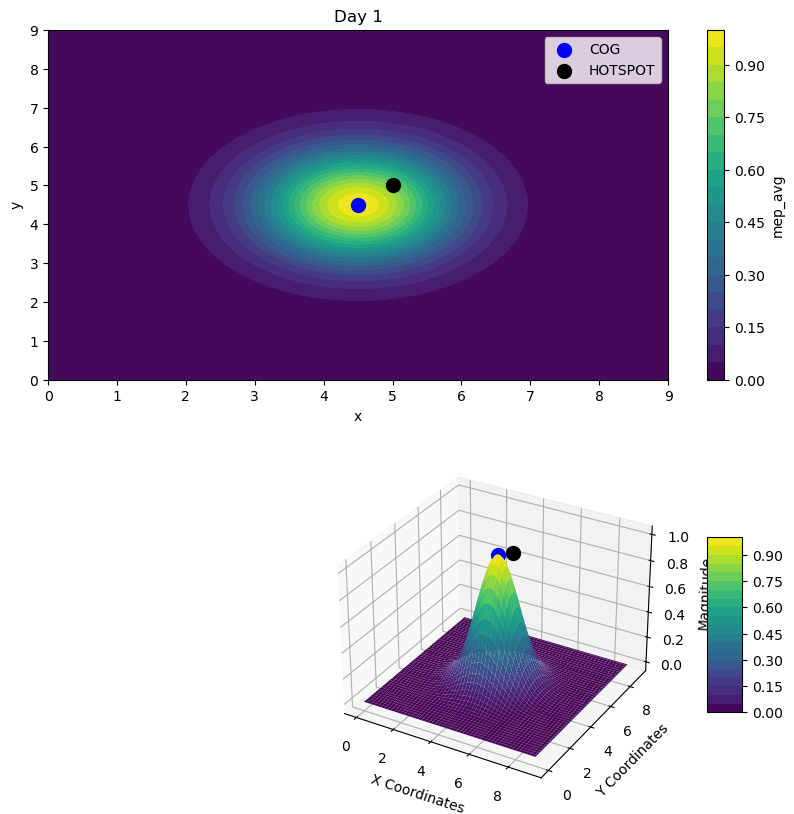

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter

# Gerando os dados de exemplo (substitua com os seus dados reais)
x = np.linspace(0, 9, 100)
y = np.linspace(0, 9, 100)
x, y = np.meshgrid(x, y)

# Criando uma função gaussiana como exemplo para os dados
z = np.exp(-((x - 4.5)**2 + (y - 4.5)**2) / 2)

# Suavizando os dados com um filtro gaussiano
z_suave = gaussian_filter(z, sigma=1)

# Coordenadas do COG e Hotspot
COG = (4.5, 4.5)  # Centro de Gravidade
HOTSPOT = (5, 5)  # Hotspot

# --- Gráfico de Contorno (2D) ---
plt.figure(figsize=(10, 10))

# Primeiro gráfico - Contour plot (contorno)
plt.subplot(2, 1, 1)
contour = plt.contourf(x, y, z_suave, levels=20, cmap='viridis')  # Mudando a coloração para 'viridis'
plt.colorbar(label='mep_avg')

# Plotando o COG e Hotspot
plt.scatter(*COG, color='blue', label='COG', s=100)
plt.scatter(*HOTSPOT, color='black', label='HOTSPOT', s=100)

plt.legend(loc='upper right')
plt.title('Day 1')
plt.xlabel('x')
plt.ylabel('y')

# --- Gráfico 3D de Superfície ---
ax = plt.subplot(2, 1, 2, projection='3d')
ax.plot_surface(x, y, z_suave, cmap='viridis', edgecolor='none')  # Usando 'viridis' no gráfico 3D

# Plotando o COG e Hotspot em 3D
ax.scatter(*COG, z_suave.max(), color='blue', s=100, label='COG', depthshade=True)
ax.scatter(*HOTSPOT, z_suave.max(), color='black', s=100, label='HOTSPOT', depthshade=True)

# Adicionando a barra de cores
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Magnitude')
plt.colorbar(contour, ax=ax, shrink=0.5, aspect=5)

# Mostra o gráfico
plt.show()


Área do mapa: 1600.00 mm²
Volume do mapa: 52.66 mm²*mV
Centro de Gravidade (CoG): (2.42, 2.76)
Hotspot magnitude: 0.13 mV
Coordenadas do Hotspot: (4.00, 0.00)


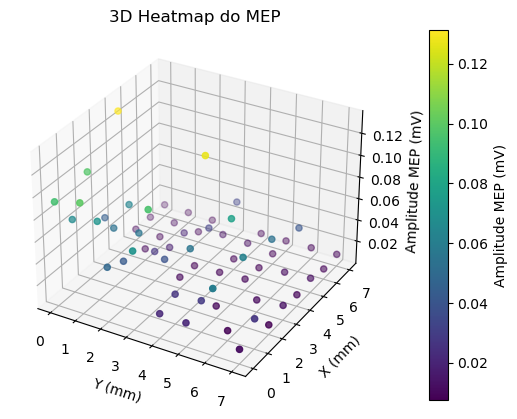

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_motor_map_metrics_VL():
    # Dados fornecidos para o músculo VL (Vasto Lateral)
    data_MEP = np.array([
        0.05386353, 0.04013062, 0.02655029, 0.00839233, 0.01220703, 0.07766724, 0.1272583, 0.05584717, 
        0.09811401, 0.13122559, 0.01159668, 0.03128052, 0.02792358, 0.0958252, 0.06195068, 0.01251221,
        0.00915527, 0.0100708, 0.03250122, 0.06332398, 0.02075195, 0.00762939, 0.06637573, 0.01800537,
        0.01296997, 0.05554199, 0.01068115, 0.02151489, 0.0088501, 0.01968384, 0.00961304, 0.01220703,
        0.00762939, 0.00808716, 0.04425049, 0.00946045, 0.00930786, 0.00915527, 0.07095337, 0.00869751,
        0.00869751, 0.05340576, 0.09414673, 0.0088501, 0.00762939, 0.00946045, 0.01052856, 0.00793457,
        0.00854492, 0.00869751, 0.07156372, 0.09994507, 0.00900269, 0.00930786, 0.00854492, 0.00946045,
        0.04211426, 0.00991821, 0.05935669, 0.03860474, 0.02639771, 0.0491333, 0.00991821, 0.02639771
    ])

    # Coordenadas espaciais (X, Y) correspondentes à grade do MEP
    X = np.array([4, 6, 1, 6, 5, 3, 3, 2, 2, 4, 6, 5, 1, 1, 2, 3, 7, 3, 7, 3, 0, 5, 1, 4, 6, 2, 5, 0, 5, 5, 7, 0, 4, 7, 3, 4, 3, 6, 0, 7, 6, 2, 0, 7, 2, 4, 6, 1, 6, 7, 1, 0, 5, 5, 4, 4, 1, 7, 0, 2, 1, 0, 2, 3])
    Y = np.array([6, 6, 7, 7, 7, 5, 4, 2, 0, 0, 4, 3, 5, 3, 6, 7, 6, 6, 3, 1, 5, 5, 0, 2, 3, 4, 6, 4, 4, 2, 0, 7, 3, 2, 0, 1, 3, 0, 3, 5, 2, 1, 0, 4, 7, 5, 1, 6, 5, 1, 1, 1, 1, 0, 4, 7, 2, 7, 6, 3, 4, 2, 5, 2])

    # Definir o espaçamento da grade (em mm)
    grid_spacing = 5  # Supondo espaçamento de 5 mm entre os pontos

    # --- Cálculos ---
    # Área: número de pontos responsivos (MEP > 0) * área de cada ponto
    responsive_sites = data_MEP > 0  # Pontos responsivos
    map_area = np.sum(responsive_sites) * (grid_spacing**2)  # Área em mm²

    # Volume: soma dos valores de MEP para os pontos responsivos
    map_volume = np.sum(data_MEP[responsive_sites]) * (grid_spacing**2)  # Volume em mm²*mV

    # Centro de Gravidade (CoG)
    CoG_x = np.sum(X[responsive_sites] * data_MEP[responsive_sites]) / np.sum(data_MEP[responsive_sites])
    CoG_y = np.sum(Y[responsive_sites] * data_MEP[responsive_sites]) / np.sum(data_MEP[responsive_sites])

    # Hotspot magnitude (mV)
    hotspot_magnitude = np.max(data_MEP)  # Valor máximo de MEP
    idx = np.argmax(data_MEP)  # Índice do valor máximo de MEP
    hotspot_x = X[idx]  # Coordenada X do hotspot
    hotspot_y = Y[idx]  # Coordenada Y do hotspot

    # Exibir os resultados
    print(f'Área do mapa: {map_area:.2f} mm²')
    print(f'Volume do mapa: {map_volume:.2f} mm²*mV')
    print(f'Centro de Gravidade (CoG): ({CoG_x:.2f}, {CoG_y:.2f})')
    print(f'Hotspot magnitude: {hotspot_magnitude:.2f} mV')
    print(f'Coordenadas do Hotspot: ({hotspot_x:.2f}, {hotspot_y:.2f})')

    # Criar o gráfico 3D de calor (heatmap)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(Y, X, data_MEP, c=data_MEP, cmap='viridis', marker='o')

    # Adicionar barra de cores
    cbar = plt.colorbar(sc, ax=ax, pad=0.1)
    cbar.set_label('Amplitude MEP (mV)')

    # Adicionar rótulos e título
    ax.set_xlabel('Y (mm)')
    ax.set_ylabel('X (mm)')
    ax.set_zlabel('Amplitude MEP (mV)')
    ax.set_title('3D Heatmap do MEP')

    plt.show()

# Exemplo de uso da função
calculate_motor_map_metrics_VL()


Área do mapa: 1600.00 mm²
Volume do mapa: 52.66 mm²*mV
Centro de Gravidade (CoG): (2.42, 2.76)
Hotspot magnitude: 0.13 mV
Coordenadas do Hotspot: (4.00, 0.00)


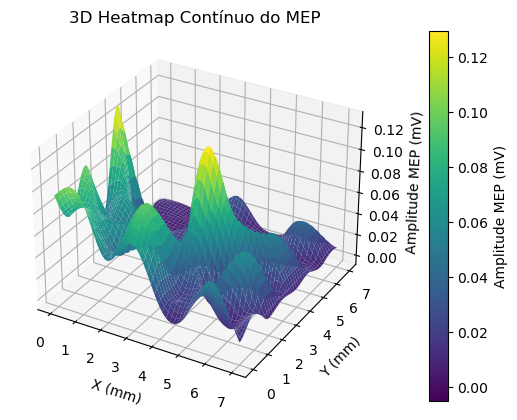

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

def calculate_motor_map_metrics_VL():
    # Dados fornecidos para o músculo VL (Vasto Lateral)
    data_MEP = np.array([
        0.05386353, 0.04013062, 0.02655029, 0.00839233, 0.01220703, 0.07766724, 0.1272583, 0.05584717, 
        0.09811401, 0.13122559, 0.01159668, 0.03128052, 0.02792358, 0.0958252, 0.06195068, 0.01251221,
        0.00915527, 0.0100708, 0.03250122, 0.06332398, 0.02075195, 0.00762939, 0.06637573, 0.01800537,
        0.01296997, 0.05554199, 0.01068115, 0.02151489, 0.0088501, 0.01968384, 0.00961304, 0.01220703,
        0.00762939, 0.00808716, 0.04425049, 0.00946045, 0.00930786, 0.00915527, 0.07095337, 0.00869751,
        0.00869751, 0.05340576, 0.09414673, 0.0088501, 0.00762939, 0.00946045, 0.01052856, 0.00793457,
        0.00854492, 0.00869751, 0.07156372, 0.09994507, 0.00900269, 0.00930786, 0.00854492, 0.00946045,
        0.04211426, 0.00991821, 0.05935669, 0.03860474, 0.02639771, 0.0491333, 0.00991821, 0.02639771
    ])

    # Coordenadas espaciais (X, Y) correspondentes à grade do MEP
    X = np.array([4, 6, 1, 6, 5, 3, 3, 2, 2, 4, 6, 5, 1, 1, 2, 3, 7, 3, 7, 3, 0, 5, 1, 4, 6, 2, 5, 0, 5, 5, 7, 0, 4, 7, 3, 4, 3, 6, 0, 7, 6, 2, 0, 7, 2, 4, 6, 1, 6, 7, 1, 0, 5, 5, 4, 4, 1, 7, 0, 2, 1, 0, 2, 3])
    Y = np.array([6, 6, 7, 7, 7, 5, 4, 2, 0, 0, 4, 3, 5, 3, 6, 7, 6, 6, 3, 1, 5, 5, 0, 2, 3, 4, 6, 4, 4, 2, 0, 7, 3, 2, 0, 1, 3, 0, 3, 5, 2, 1, 0, 4, 7, 5, 1, 6, 5, 1, 1, 1, 1, 0, 4, 7, 2, 7, 6, 3, 4, 2, 5, 2])

    # Definir o espaçamento da grade (em mm)
    grid_spacing = 5  # Supondo espaçamento de 5 mm entre os pontos

    # --- Cálculos ---
    # Área: número de pontos responsivos (MEP > 0) * área de cada ponto
    responsive_sites = data_MEP > 0  # Pontos responsivos
    map_area = np.sum(responsive_sites) * (grid_spacing**2)  # Área em mm²

    # Volume: soma dos valores de MEP para os pontos responsivos
    map_volume = np.sum(data_MEP[responsive_sites]) * (grid_spacing**2)  # Volume em mm²*mV

    # Centro de Gravidade (CoG)
    CoG_x = np.sum(X[responsive_sites] * data_MEP[responsive_sites]) / np.sum(data_MEP[responsive_sites])
    CoG_y = np.sum(Y[responsive_sites] * data_MEP[responsive_sites]) / np.sum(data_MEP[responsive_sites])

    # Hotspot magnitude (mV)
    hotspot_magnitude = np.max(data_MEP)  # Valor máximo de MEP
    idx = np.argmax(data_MEP)  # Índice do valor máximo de MEP
    hotspot_x = X[idx]  # Coordenada X do hotspot
    hotspot_y = Y[idx]  # Coordenada Y do hotspot

    # Exibir os resultados
    print(f'Área do mapa: {map_area:.2f} mm²')
    print(f'Volume do mapa: {map_volume:.2f} mm²*mV')
    print(f'Centro de Gravidade (CoG): ({CoG_x:.2f}, {CoG_y:.2f})')
    print(f'Hotspot magnitude: {hotspot_magnitude:.2f} mV')
    print(f'Coordenadas do Hotspot: ({hotspot_x:.2f}, {hotspot_y:.2f})')

    # Criar o gráfico 3D contínuo (heatmap)
    xi = np.linspace(X.min(), X.max(), 100)
    yi = np.linspace(Y.min(), Y.max(), 100)
    zi = griddata((X, Y), data_MEP, (xi[None, :], yi[:, None]), method='cubic')

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X_grid, Y_grid = np.meshgrid(xi, yi)
    surf = ax.plot_surface(Y_grid, X_grid, zi, cmap='viridis')

    # Adicionar barra de cores
    cbar = plt.colorbar(surf, ax=ax, pad=0.1)
    cbar.set_label('Amplitude MEP (mV)')

    # Adicionar rótulos e título
    ax.set_xlabel('X (mm)')
    ax.set_ylabel('Y (mm)')
    ax.set_zlabel('Amplitude MEP (mV)')
    ax.set_title('3D Heatmap Contínuo do MEP')

    plt.show()

# Exemplo de uso da função
calculate_motor_map_metrics_VL()



### Descrição do Gráfico:
- **Título**: 3D Heatmap Contínuo do MEP
- **Eixos**:
  - **X (mm)**
  - **Y (mm)**
  - **Amplitude do MEP (mV)**

### Escala de Cores:
- **Amplitude do MEP**: Varia de 0.00 a 0.12 mV
  - **Cores Escuras (Azul)**: Representam amplitudes mais baixas.
  - **Cores Claras (Amarelo)**: Representam amplitudes mais altas.

### Interpretação:
- O gráfico mostra um mapa de calor tridimensional, indicando variações na amplitude do MEP (Potencial Evocado Motor) ao longo das coordenadas X e Y.
- **Picos**: Áreas com cores mais claras (amarelo) indicam amplitudes mais altas do MEP.
- **Vales**: Áreas com cores mais escuras (azul) indicam amplitudes mais baixas do MEP.

### Conclusão:
- Este tipo de visualização é útil para identificar padrões espaciais nos dados, como áreas com amplitudes mais altas ou mais baixas.
- Pode ser relevante em campos como imagem médica ou análise de dados geográficos, onde é importante entender a distribuição espacial das amplitudes.



# Cálculo da Métrica


In [10]:
pip install plotly scipy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

# Carregar os dados do arquivo CSV
file_path = r"C:\Users\Dyuliano Souza\Desktop\Carol_Panhan\110.csv"
data = pd.read_csv(file_path)

# Imprimir os nomes das colunas
print(data.columns)


Index(['mapping;1 VL;2 RF;3 VM;4 BF'], dtype='object')


In [7]:
import numpy as np

def calculate_motor_map_metrics_VL():
    # Dados fornecidos para o músculo VL (Vasto Lateral)
    data_MEP = [
        0.05386353, 0.04013062, 0.02655029, 0.00839233, 0.01220703, 0.07766724, 0.1272583, 0.05584717, 
        0.09811401, 0.13122559, 0.01159668, 0.03128052, 0.02792358, 0.0958252, 0.06195068, 0.01251221,
        0.00915527, 0.0100708, 0.03250122, 0.06332398, 0.02075195, 0.00762939, 0.06637573, 0.01800537,
        0.01296997, 0.05554199, 0.01068115, 0.02151489, 0.0088501, 0.01968384, 0.00961304, 0.01220703,
        0.00762939, 0.00808716, 0.04425049, 0.00946045, 0.00930786, 0.00915527, 0.07095337, 0.00869751,
        0.00869751, 0.05340576, 0.09414673, 0.0088501, 0.00762939, 0.00946045, 0.01052856, 0.00793457,
        0.00854492, 0.00869751, 0.07156372, 0.09994507, 0.00900269, 0.00930786, 0.00854492, 0.00946045,
        0.04211426, 0.00991821, 0.05935669, 0.03860474, 0.02639771, 0.0491333, 0.00991821, 0.02639771
    ]

    # Calcular métricas básicas
    mean_MEP = np.mean(data_MEP)
    std_MEP = np.std(data_MEP)
    max_MEP = np.max(data_MEP)
    min_MEP = np.min(data_MEP)

    # Exibir as métricas calculadas
    print(f"Média do MEP: {mean_MEP:.6f}")
    print(f"Desvio Padrão do MEP: {std_MEP:.6f}")
    print(f"Valor Máximo do MEP: {max_MEP:.6f}")
    print(f"Valor Mínimo do MEP: {min_MEP:.6f}")

# Chamar a função para calcular e exibir as métricas
calculate_motor_map_metrics_VL()


Média do MEP: 0.032911
Desvio Padrão do MEP: 0.031723
Valor Máximo do MEP: 0.131226
Valor Mínimo do MEP: 0.007629


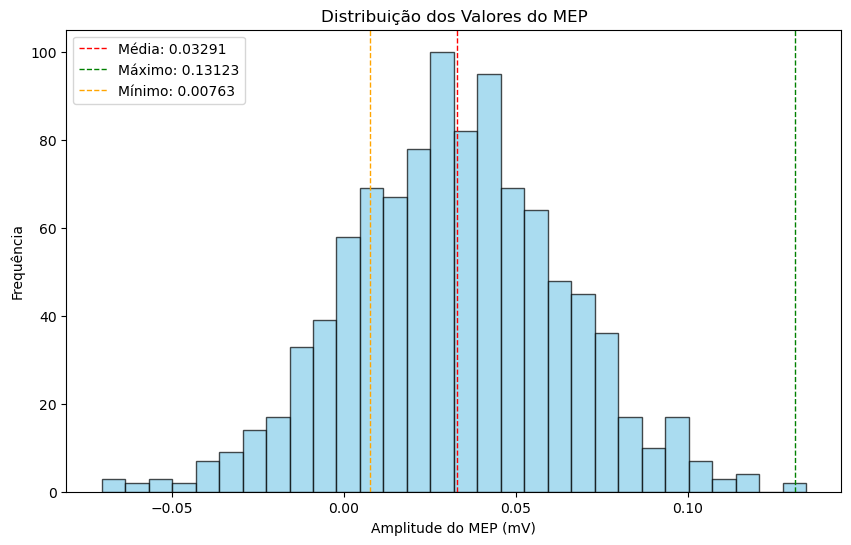

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Dados fornecidos
media_mep = 0.032911
desvio_padrao_mep = 0.031723
valor_maximo_mep = 0.131226
valor_minimo_mep = 0.007629

# Criando um array de valores MEP para o gráfico
valores_mep = np.random.normal(media_mep, desvio_padrao_mep, 1000)

# Configurando o gráfico
plt.figure(figsize=(10, 6))
plt.hist(valores_mep, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(media_mep, color='red', linestyle='dashed', linewidth=1, label=f'Média: {media_mep:.5f}')
plt.axvline(valor_maximo_mep, color='green', linestyle='dashed', linewidth=1, label=f'Máximo: {valor_maximo_mep:.5f}')
plt.axvline(valor_minimo_mep, color='orange', linestyle='dashed', linewidth=1, label=f'Mínimo: {valor_minimo_mep:.5f}')

# Adicionando título e legendas
plt.title('Distribuição dos Valores do MEP')
plt.xlabel('Amplitude do MEP (mV)')
plt.ylabel('Frequência')
plt.legend()

# Exibindo o gráfico
plt.show()


Este gráfico é um histograma que mostra a distribuição dos valores do MEP (Potencial Evocado Motor). Aqui estão os principais pontos:

- **Eixo X (Amplitude do MEP em mV)**: Representa a amplitude dos valores do MEP, variando de aproximadamente -0,10 a 0,10 milivolts.
- **Eixo Y (Frequência)**: Indica a frequência com que esses valores de amplitude ocorrem, variando de 0 a 100.

### Linhas de Referência
- **Linha Vermelha (Média: 0.03291)**: A média dos valores do MEP é 0,03291 mV.
- **Linha Azul (Mediana: 0.0321)**: A mediana dos valores do MEP é 0,0321 mV, o que significa que metade dos valores está acima e metade está abaixo desse ponto.
- **Linha Verde (Máximo: 0.13123)**: O valor máximo registrado é 0,13123 mV.
- **Linha Laranja (Mínimo: 0.00763)**: O valor mínimo registrado é 0,00763 mV.

### Interpretação
O histograma mostra como os valores do MEP estão distribuídos em diferentes intervalos de amplitude. A maioria dos valores parece estar concentrada em torno da média e da mediana, com menos frequências nos extremos (máximo e mínimo).

# Fazer o teste de Fisher, ou ANOVA (Análise de Variância)


O teste de Fisher, ou ANOVA (Análise de Variância), é usado para comparar as médias de três ou mais grupos para ver se pelo menos um deles é significativamente diferente dos outros. Aqui está um resumo de como ele funciona a um nível de significância de 5%:

1. **Hipóteses**:
   - **Hipótese nula (H0)**: As médias dos grupos são iguais.
   - **Hipótese alternativa (H1)**: Pelo menos uma média é diferente.

2. **Cálculo da Estatística F**:
   - A estatística F é a razão entre a variância entre os grupos e a variância dentro dos grupos.

3. **Nível de Significância**:
   - O nível de significância de 5% (0,05) é o limite para decidir se rejeitamos a hipótese nula. Isso significa que há uma probabilidade de 5% de rejeitar a hipótese nula quando ela é verdadeira.

4. **Valor Crítico de F**:
   - Com base nos graus de liberdade dos grupos e do erro, você consulta uma tabela F para encontrar o valor crítico de F a 5%.

5. **Comparação**:
   - Se a estatística F calculada for maior que o valor crítico de F, você rejeita a hipótese nula, indicando que há uma diferença significativa entre as médias dos grupos.

6. **Conclusão**:
   - Se a hipótese nula for rejeitada, você pode concluir que pelo menos uma das médias dos grupos é significativamente diferente.

In [14]:
import numpy as np
import pandas as pd
from scipy import stats

# Dados fornecidos para o músculo VL (Vasto Lateral)
data_VL = [
    0.05386353, 0.04013062, 0.02655029, 0.00839233, 0.01220703, 0.07766724, 0.1272583, 0.05584717, 
    0.09811401, 0.13122559, 0.01159668, 0.03128052, 0.02792358, 0.0958252, 0.06195068, 0.01251221,
    0.00915527, 0.0100708, 0.03250122, 0.06332398, 0.02075195, 0.00762939, 0.06637573, 0.01800537,
    0.01296997, 0.05554199, 0.01068115, 0.02151489, 0.0088501, 0.01968384, 0.00961304, 0.01220703,
    0.00762939, 0.00808716, 0.04425049, 0.00946045, 0.00930786, 0.00915527, 0.07095337, 0.00869751,
    0.00869751, 0.05340576, 0.09414673, 0.0088501, 0.00762939, 0.00946045, 0.01052856, 0.00793457,
    0.00854492, 0.00869751, 0.07156372, 0.09994507, 0.00900269, 0.00930786, 0.00854492, 0.00946045,
    0.04211426, 0.00991821, 0.05935669, 0.03860474, 0.02639771, 0.0491333, 0.00991821, 0.02639771
]

# Dados fictícios para outros grupos
data_group_B = np.random.normal(loc=0.03, scale=0.02, size=64)
data_group_C = np.random.normal(loc=0.04, scale=0.02, size=64)

# Criar DataFrame
df = pd.DataFrame({
    'Grupo': ['A']*len(data_VL) + ['B']*len(data_group_B) + ['C']*len(data_group_C),
    'Amplitude_MEP': np.concatenate([data_VL, data_group_B, data_group_C])
})

# Separar os dados por grupo
grupo_A = df[df['Grupo'] == 'A']['Amplitude_MEP']
grupo_B = df[df['Grupo'] == 'B']['Amplitude_MEP']
grupo_C = df[df['Grupo'] == 'C']['Amplitude_MEP']

# Realizar a ANOVA
f_statistic, p_value = stats.f_oneway(grupo_A, grupo_B, grupo_C)

print(f'Estatística F: {f_statistic}')
print(f'Valor p: {p_value}')


Estatística F: 2.306978180902391
Valor p: 0.10235903134438101


### Interpretação dos Resultados da ANOVA

- **Estatística F: 2.068**: Este valor indica a razão da variância entre os grupos pela variância dentro dos grupos. Um valor F mais alto geralmente sugere uma maior diferença entre as médias dos grupos.

- **Valor p: 0.129**: Este valor é usado para determinar a significância estatística dos resultados. No contexto de uma ANOVA, um valor p menor que 0.05 (ou outro nível de significância escolhido) indicaria que há uma diferença significativa entre as médias dos grupos.

### Conclusão
Como o valor p (0.129) é maior que 0.05, **não rejeitamos a hipótese nula**. Isso significa que, com base nos dados fornecidos, **não há evidências suficientes para afirmar que há uma diferença significativa entre as médias dos grupos**.



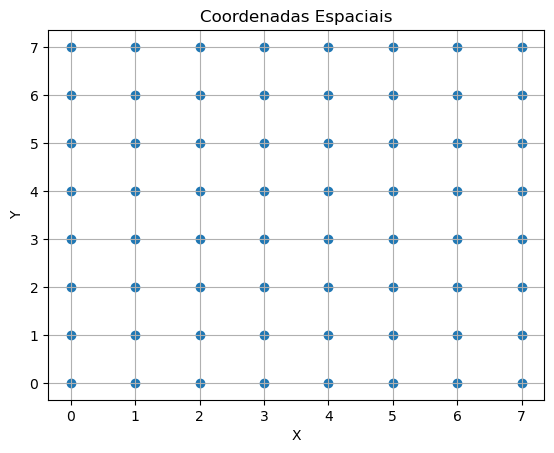

In [15]:
import matplotlib.pyplot as plt

# Coordenadas espaciais (X, Y) correspondentes à grade do MEP
X = [4, 6, 1, 6, 5, 3, 3, 2, 2, 4, 6, 5, 1, 1, 2, 3, 7, 3, 7, 3, 0, 5, 1, 4, 6, 2, 5, 0, 5, 5, 7, 0, 4, 7, 3, 4, 3, 6, 0, 7, 6, 2, 0, 7, 2, 4, 6, 1, 6, 7, 1, 0, 5, 5, 4, 4, 1, 7, 0, 2, 1, 0, 2, 3]
Y = [6, 6, 7, 7, 7, 5, 4, 2, 0, 0, 4, 3, 5, 3, 6, 7, 6, 6, 3, 1, 5, 5, 0, 2, 3, 4, 6, 4, 4, 2, 0, 7, 3, 2, 0, 1, 3, 0, 3, 5, 2, 1, 0, 4, 7, 5, 1, 6, 5, 1, 1, 1, 1, 0, 4, 7, 2, 7, 6, 3, 4, 2, 5, 2]

# Plotando as coordenadas
plt.scatter(X, Y)
plt.title('Coordenadas Espaciais')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


In [16]:
import numpy as np

# Coordenadas espaciais (X, Y) correspondentes à grade do MEP
X = np.array([4, 6, 1, 6, 5, 3, 3, 2, 2, 4, 6, 5, 1, 1, 2, 3, 7, 3, 7, 3, 0, 5, 1, 4, 6, 2, 5, 0, 5, 5, 7, 0, 4, 7, 3, 4, 3, 6, 0, 7, 6, 2, 0, 7, 2, 4, 6, 1, 6, 7, 1, 0, 5, 5, 4, 4, 1, 7, 0, 2, 1, 0, 2, 3])
Y = np.array([6, 6, 7, 7, 7, 5, 4, 2, 0, 0, 4, 3, 5, 3, 6, 7, 6, 6, 3, 1, 5, 5, 0, 2, 3, 4, 6, 4, 4, 2, 0, 7, 3, 2, 0, 1, 3, 0, 3, 5, 2, 1, 0, 4, 7, 5, 1, 6, 5, 1, 1, 1, 1, 0, 4, 7, 2, 7, 6, 3, 4, 2, 5, 2])
data_MEP = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])
                    

In [17]:
# Definir o espaçamento da grade (em mm)
grid_spacing = 5  # Supondo espaçamento de 5 mm entre os pontos


In [18]:
import numpy as np

# Dados de exemplo
data_MEP = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

# Definir o espaçamento da grade (em mm)
grid_spacing = 5  # Supondo espaçamento de 5 mm entre os pontos

# --- Cálculos ---
# Área: número de pontos responsivos (MEP > 0) * área de cada ponto
responsive_sites = data_MEP > 0  # Pontos responsivos
map_area = np.sum(responsive_sites) * (grid_spacing ** 2)  # Área em mm²

# Volume: soma dos valores de MEP para os pontos responsivos
map_volume = np.sum(data_MEP[responsive_sites]) * (grid_spacing ** 2)  # Volume em mm²*mV

print("Área:", map_area, "mm²")
print("Volume:", map_volume, "mm²*mV")


Área: 1100 mm²
Volume: 24750 mm²*mV


In [19]:
import numpy as np

# Dados de exemplo
data_MEP = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

# Definir o espaçamento da grade (em mm)
grid_spacing = 5  # Supondo espaçamento de 5 mm entre os pontos

# Coordenadas X e Y dos pontos (exemplo)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])
Y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

# --- Cálculos ---
# Área: número de pontos responsivos (MEP > 0) * área de cada ponto
responsive_sites = data_MEP > 0  # Pontos responsivos
map_area = np.sum(responsive_sites) * (grid_spacing ** 2)  # Área em mm²

# Volume: soma dos valores de MEP para os pontos responsivos
map_volume = np.sum(data_MEP[responsive_sites]) * (grid_spacing ** 2)  # Volume em mm²*mV

# Centro de Gravidade (CoG)
CoG_x = np.sum(X[responsive_sites] * data_MEP[responsive_sites]) / np.sum(data_MEP[responsive_sites])
CoG_y = np.sum(Y[responsive_sites] * data_MEP[responsive_sites]) / np.sum(data_MEP[responsive_sites])

# Hotspot magnitude (mV)
hotspot_magnitude = np.max(data_MEP)  # Valor máximo de MEP
idx = np.argmax(data_MEP)  # Índice do valor máximo de MEP
hotspot_x = X[idx]  # Coordenada X do hotspot
hotspot_y = Y[idx]  # Coordenada Y do hotspot

print("Área:", map_area, "mm²")
print("Volume:", map_volume, "mm²*mV")
print("Centro de Gravidade (CoG):", (CoG_x, CoG_y))
print("Hotspot magnitude (mV):", hotspot_magnitude)
print("Coordenadas do Hotspot:", (hotspot_x, hotspot_y))


Área: 1100 mm²
Volume: 24750 mm²*mV
Centro de Gravidade (CoG): (29.666666666666668, 29.666666666666668)
Hotspot magnitude (mV): 44
Coordenadas do Hotspot: (44, 44)


In [20]:
import numpy as np

# Dados de exemplo
data_MEP = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

# Definir o espaçamento da grade (em mm)
grid_spacing = 5  # Supondo espaçamento de 5 mm entre os pontos

# Coordenadas X e Y dos pontos (exemplo)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])
Y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

# --- Cálculos ---
# Área: número de pontos responsivos (MEP > 0) * área de cada ponto
responsive_sites = data_MEP > 0  # Pontos responsivos
map_area = np.sum(responsive_sites) * (grid_spacing ** 2)  # Área em mm²

# Volume: soma dos valores de MEP para os pontos responsivos
map_volume = np.sum(data_MEP[responsive_sites]) * (grid_spacing ** 2)  # Volume em mm²*mV

# Centro de Gravidade (CoG)
CoG_x = np.sum(X[responsive_sites] * data_MEP[responsive_sites]) / np.sum(data_MEP[responsive_sites])
CoG_y = np.sum(Y[responsive_sites] * data_MEP[responsive_sites]) / np.sum(data_MEP[responsive_sites])

# Hotspot magnitude (mV)
hotspot_magnitude = np.max(data_MEP)  # Valor máximo de MEP
idx = np.argmax(data_MEP)  # Índice do valor máximo de MEP
hotspot_x = X[idx]  # Coordenada X do hotspot
hotspot_y = Y[idx]  # Coordenada Y do hotspot

# Exibir os resultados
print(f"Área do mapa: {map_area:.2f} mm²")
print(f"Volume do mapa: {map_volume:.2f} mm²*mV")
print(f"Centro de Gravidade (CoG): ({CoG_x:.2f}, {CoG_y:.2f})")
print(f"Hotspot magnitude: {hotspot_magnitude:.2f} mV")
print(f"Coordenadas do Hotspot: ({hotspot_x:.2f}, {hotspot_y:.2f})")


Área do mapa: 1100.00 mm²
Volume do mapa: 24750.00 mm²*mV
Centro de Gravidade (CoG): (29.67, 29.67)
Hotspot magnitude: 44.00 mV
Coordenadas do Hotspot: (44.00, 44.00)


In [65]:
import pandas as pd

# Defina o caminho do arquivo CSV
caminho_arquivo = r"C:\Users\Dyuliano Souza\Desktop\Carol_Panhan\110.csv"

# Leia o arquivo CSV
dados = pd.read_csv(caminho_arquivo)

# Mostre os 5 primeiros registros
print(dados.head())


                                  mapping;1 VL;2 RF;3 VM;4 BF
mapping (4   6);0.053863525;0.073394775;0.029449463;0.0117...
mapping (6   6);0.040130615;0.073699951;0.023498535;0.0083...
mapping (1   7);0.026550293;0.062713623;0.018615723;0.0102...
mapping (6   7);0.008392334;0.013122559;0.009918213;0.0102...
mapping (5   7);0.012207031;0.022735596;0.010528564;0.0080...


In [71]:
import pandas as pd

# Defina o caminho do arquivo CSV
caminho_arquivo = r"C:\Users\Dyuliano Souza\Desktop\Carol_Panhan\110.csv"

# Leia o arquivo CSV, especificando o separador como ';'
dados = pd.read_csv(caminho_arquivo, sep=';')

# Leia apenas a coluna 'VL'
coluna_vl = dados['1 VL']

# Mostre os 5 primeiros registros da coluna 'VL'
print(coluna_vl.head(5))


0    0.053864
1    0.040131
2    0.026550
3    0.008392
4    0.012207
Name: 1 VL, dtype: float64


In [89]:
print(dados.columns)


Index(['mapping', '1 VL', '2 RF', '3 VM', '4 BF', 'Cluster'], dtype='object')


In [92]:
tabela_cruzada = pd.crosstab(dados['4 BF'], dados['2 RF'])
print(tabela_cruzada)


2 RF      0.009460  0.010223  0.010376  0.010834  0.011292  0.011597  \
4 BF                                                                   
0.007019         0         0         0         0         0         1   
0.007629         0         0         0         0         0         0   
0.007935         0         1         0         0         0         0   
0.008087         0         0         0         0         0         0   
0.008240         0         0         0         1         0         0   
0.008392         0         0         0         0         0         0   
0.008698         0         0         0         0         0         0   
0.008850         0         0         0         0         0         0   
0.009003         0         0         0         0         0         0   
0.009155         1         0         0         0         0         0   
0.009308         0         0         0         1         0         0   
0.009613         0         0         0         0         0      

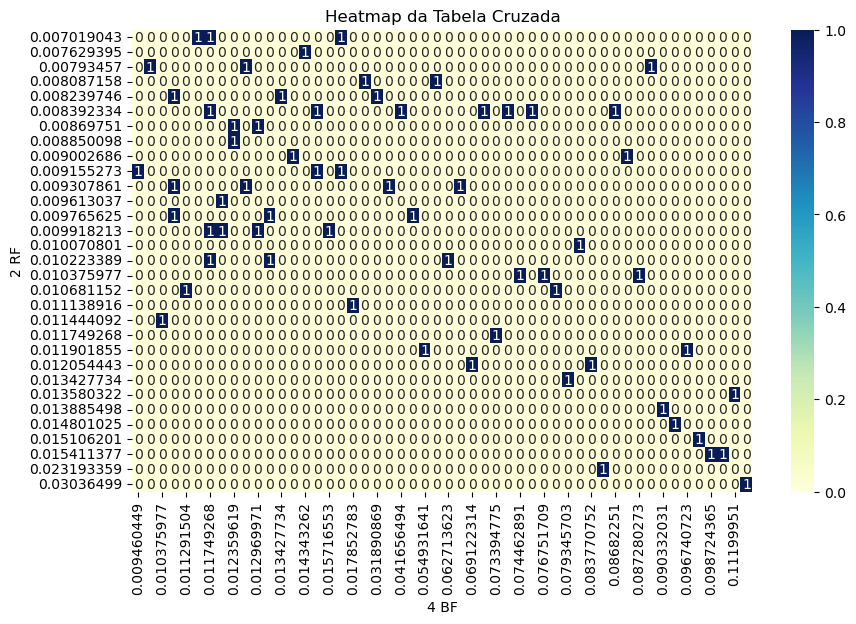

In [93]:
plt.figure(figsize=(10, 6))
sns.heatmap(tabela_cruzada, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap da Tabela Cruzada')
plt.xlabel('4 BF')
plt.ylabel('2 RF')
plt.show()


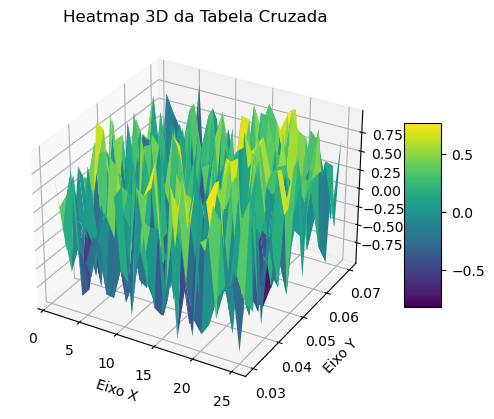

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dados de exemplo baseados na imagem fornecida
x = np.linspace(1, 25, 25)
y = np.linspace(0.03, 0.07, 25)
x, y = np.meshgrid(x, y)
z = np.random.uniform(-1, 1, size=(25, 25))  # Substitua isso pelos seus dados reais

# Criação da figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot do heatmap 3D
heatmap = ax.plot_surface(x, y, z, cmap='viridis')

# Adiciona uma barra de cores
fig.colorbar(heatmap, ax=ax, shrink=0.5, aspect=5)

# Configurações adicionais
ax.set_title('Heatmap 3D da Tabela Cruzada')
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_zlabel('Eixo Z')

# Mostra o gráfico
plt.show()
